In [1]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import get_cmap
import pandas as pd

# Define the directory containing the raw audio files
pacific_imperial_pigeon_raw_dir = '/home/jupyter/data/raw_data/pacific_imperial_pigeon_raw/'
white_throated_pigeon_raw_dir = '/home/jupyter/data/raw_data/white_throated_pigeon_raw/'
tooth_billed_pigeon_raw_dir = '/home/jupyter/data/raw_data/tooth_billed_pigeon_raw/'

## Plot the data files

In [2]:
import matplotlib.pyplot as plt
import numpy as np



def extract_bird_data(input_data):
    file_data = {}
    for row in input_data.itertuples(index=False):
        filename, start, end, bird = row
        if filename not in file_data:
            file_data[filename] = []
        file_data[filename].append((start, end, bird))
    return file_data

def plot_bird_data(file_data):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for filename, data in file_data.items():
        bird_data = {}
        for start, end, bird in data:
            if bird not in bird_data:
                bird_data[bird] = []
            bird_data[bird].append((start, end, bird))
        
        species_colors = {
            species: (colors[i % len(colors)], 0.2 + 0.8 * (i / len(bird_data)))
            for i, species in enumerate(bird_data.keys())
        }

        all_data = []
        for bird, times in bird_data.items():
            all_data.extend(times)

        start_time = min(start for start, end, _ in all_data)
        end_time = max(end for start, end, _ in all_data)

        fig, ax = plt.subplots(figsize=(12, 6))

        for start, end, species in all_data:
            color, height = species_colors[species]
            ax.plot([start, start], [0, height], color=color, linewidth=2)
            ax.plot([start, end], [height, height], color=color, linewidth=2)
            ax.plot([end, end], [height, 0], color=color, linewidth=2)

        ax.set_xlim(start_time - 1, end_time + 1)
        ax.set_xticks(np.arange(start_time, end_time + 1, (end_time - start_time) / 20))  # Increase number of ticks
        ax.set_xlabel('Time (s)')

        ax.set_ylim(0, 1.2)
        ax.set_yticks([])

        legend_elements = [
            plt.Line2D([0], [0], color=color, lw=2, label=species)
            for species, (color, _) in species_colors.items()
        ]
        ax.legend(handles=legend_elements, loc='upper left')
        ax.set_title(f'Bird Calls from {filename}')

        plt.show()

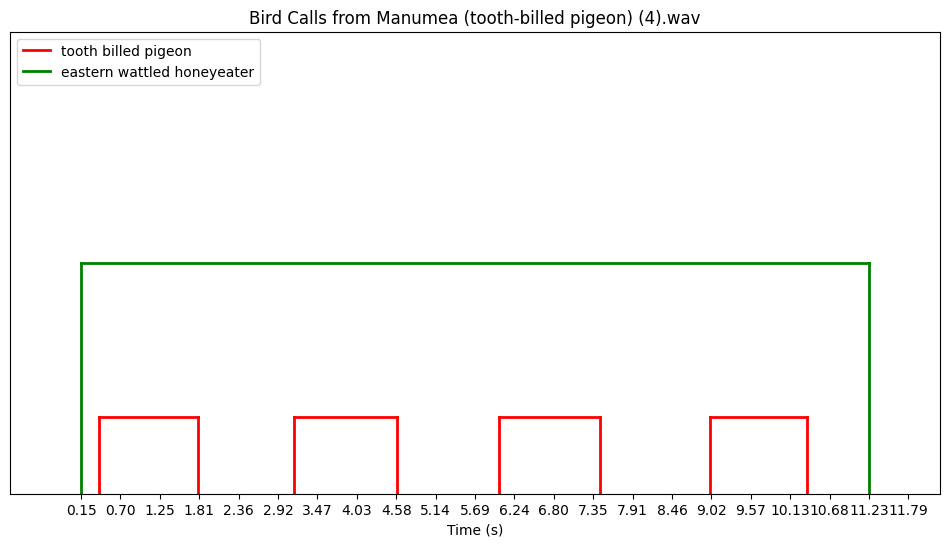

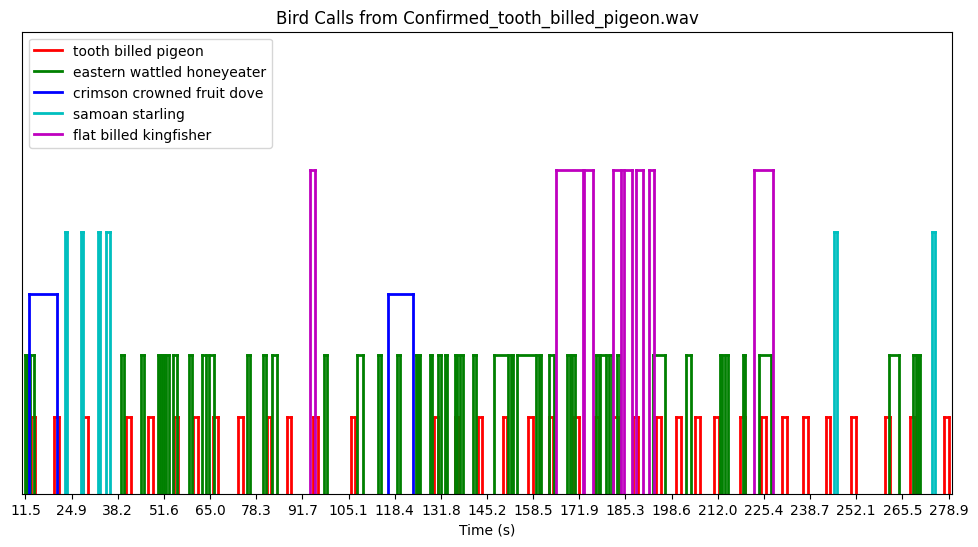

In [4]:
input_data_manumea = pd.read_csv(os.path.join(tooth_billed_pigeon_raw_dir+'tooth_billed_pigeon_metadata.csv'))

bird_data_manumea = extract_bird_data(input_data_manumea)
plot_bird_data(bird_data_manumea)

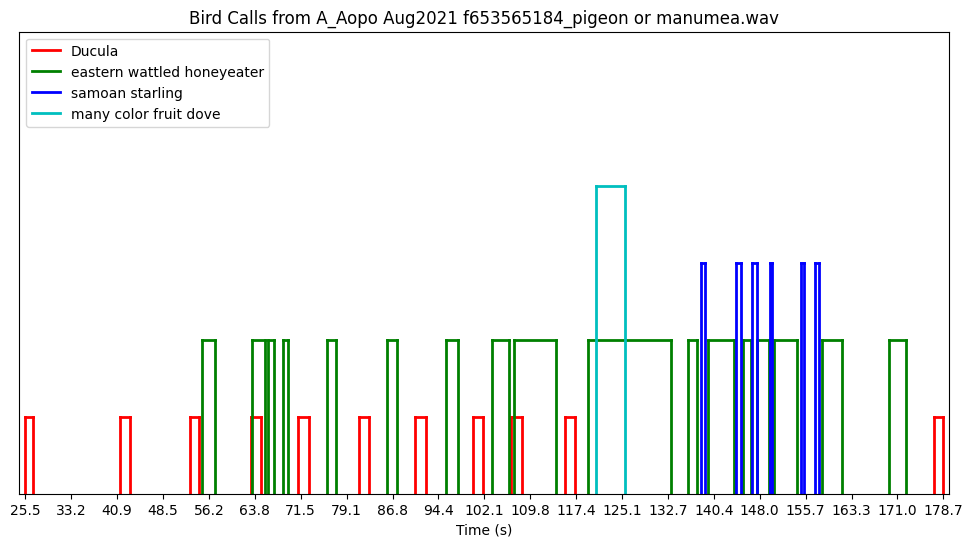

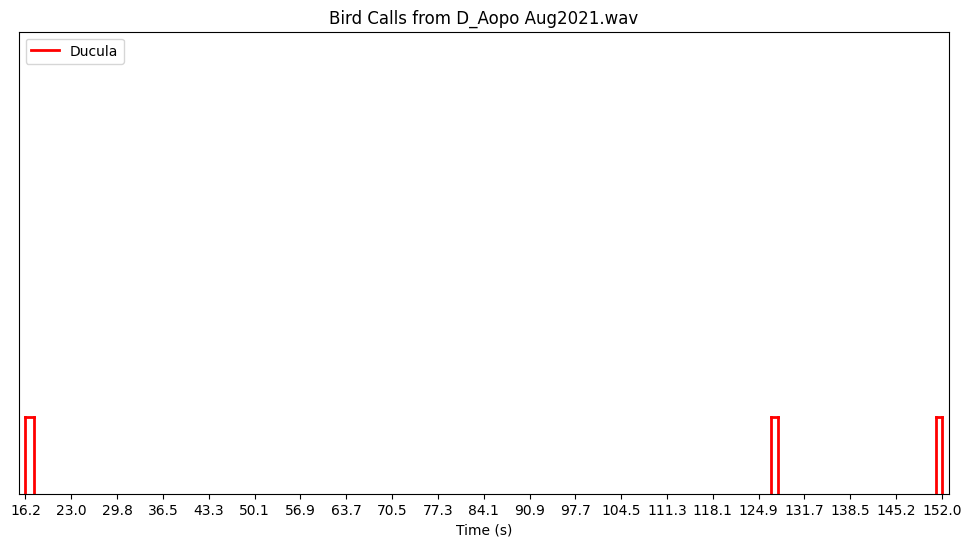

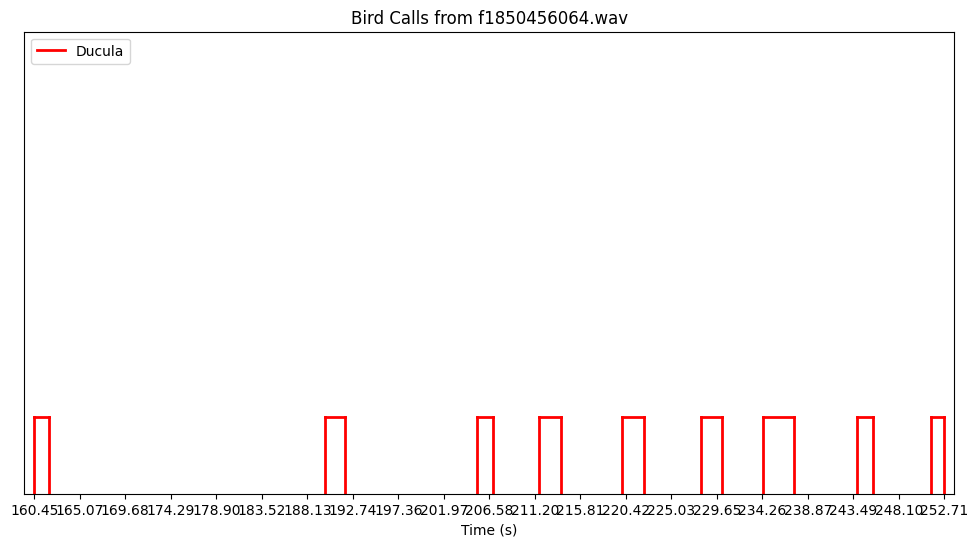

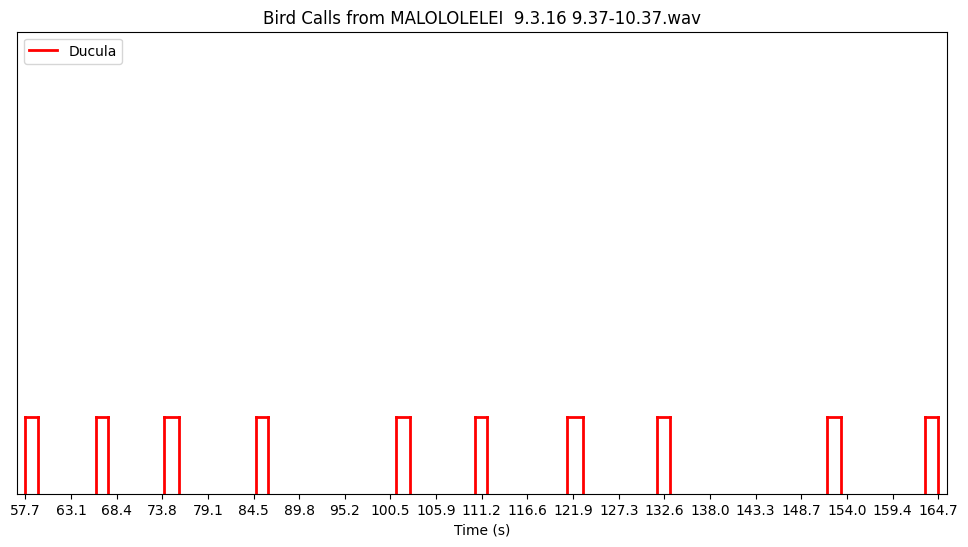

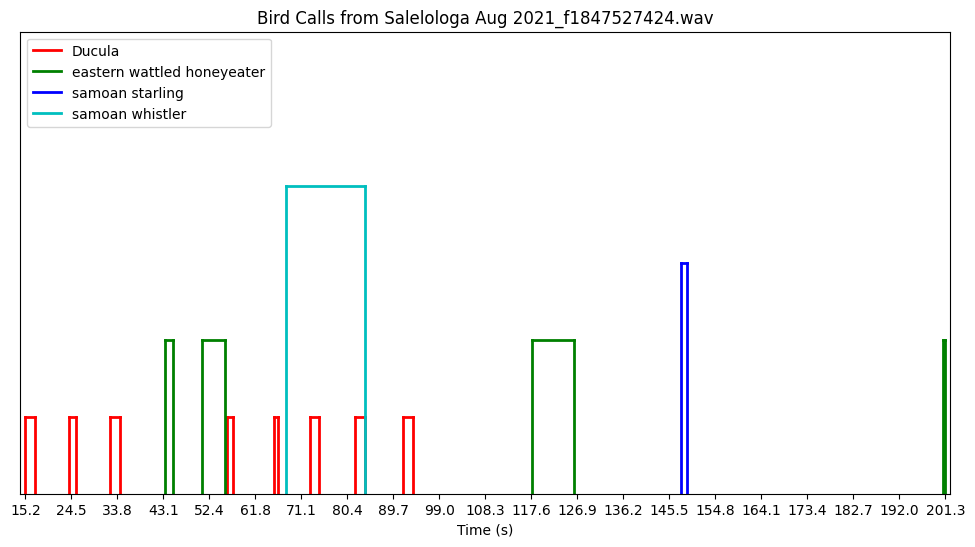

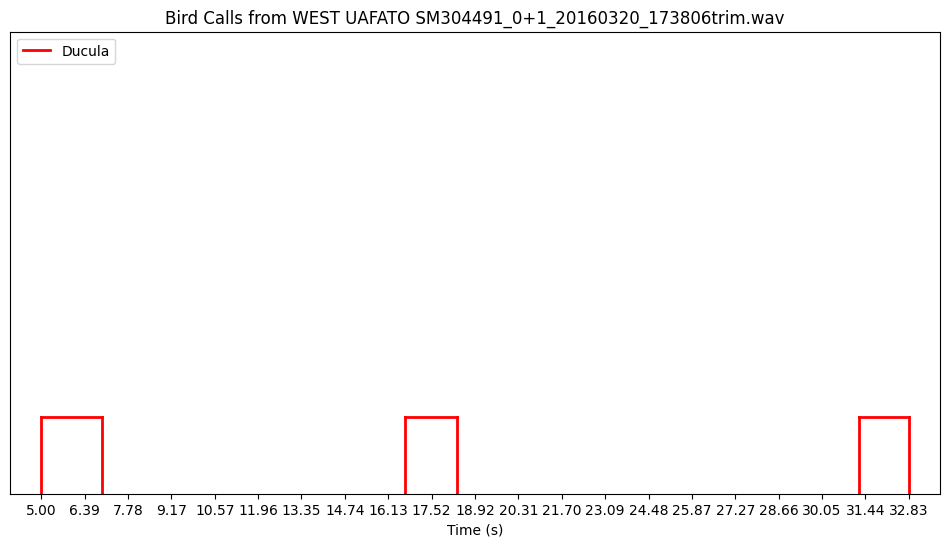

In [5]:
input_data_ducula = pd.read_csv(os.path.join(pacific_imperial_pigeon_raw_dir+'pacific_imperial_pigeon_metadata.csv'))

bird_data_ducula = extract_bird_data(input_data_ducula)
plot_bird_data(bird_data_ducula)

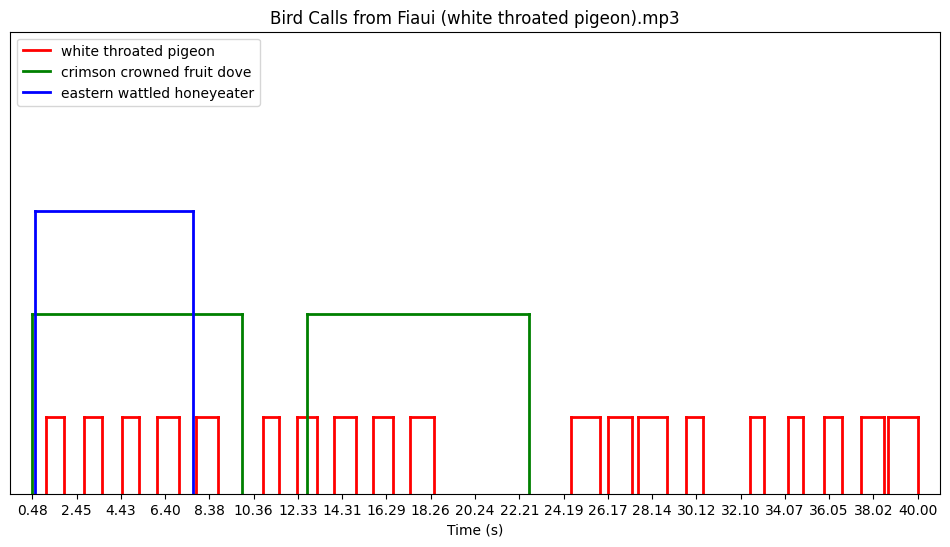

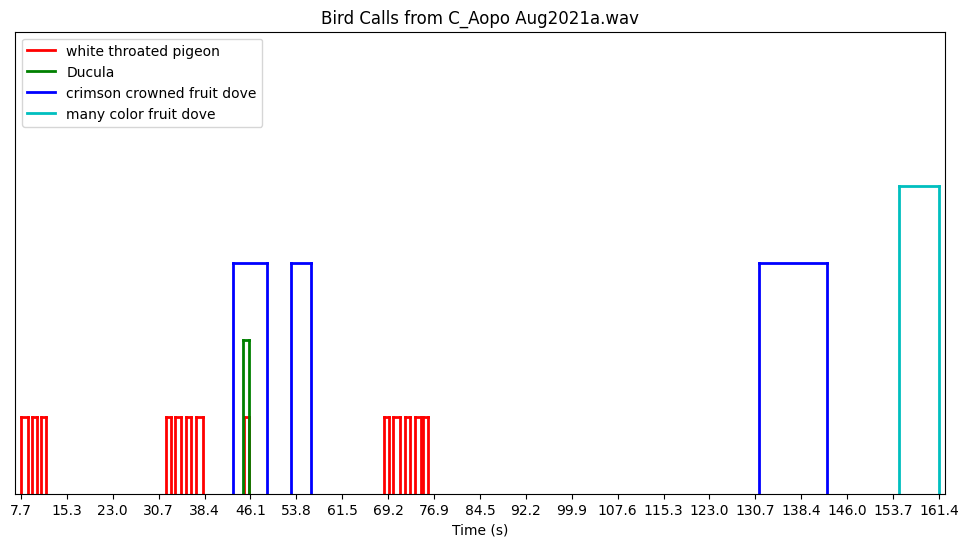

In [6]:
input_data_wtp = pd.read_csv(os.path.join(white_throated_pigeon_raw_dir+'white_throated_pigeon_metadata.csv'))

bird_data_wtp = extract_bird_data(input_data_wtp)
plot_bird_data(bird_data_wtp)

In [3]:
def calculate_duration(input_data,species):
    data = input_data[input_data["species"] == species]
    durations = (data["end_time"] - data["start_time"]).tolist()
    print (f"max duration: {max(durations)}")
    return sum(durations) / len(durations)

In [7]:
# Calculate durations
manumea_duration = calculate_duration(input_data_manumea,'tooth billed pigeon')
# Add a buffer (e.g., 20% of the average duration)
buffer = 0.1 * manumea_duration
ideal_segment_length = manumea_duration + buffer

print(f"Ideal segment length: {ideal_segment_length:.2f} seconds")


max duration: 1.4796510920000117
Ideal segment length: 1.49 seconds


In [8]:
# Calculate durations
wtp_duration = calculate_duration(input_data_wtp,'white throated pigeon')
# Add a buffer (e.g., 20% of the average duration)
buffer = 0.1 * wtp_duration
ideal_segment_length = wtp_duration + buffer

print(f"Ideal segment length: {ideal_segment_length:.2f} seconds")

max duration: 1.3000000000000007
Ideal segment length: 1.03 seconds


In [9]:
# Calculate durations
pip_duration = calculate_duration(input_data_ducula,'Ducula')
# Add a buffer (e.g., 20% of the average duration)
buffer = 0.1 * pip_duration
ideal_segment_length = pip_duration + buffer

print(f"Ideal segment length: {ideal_segment_length:.2f} seconds")

max duration: 3.139999998999997
Ideal segment length: 1.81 seconds
